In [1]:
# loading all the dependencies
import pandas as pd
import numpy as np
import uncertainties as uc

from openpyxl import load_workbook
pd.options.display.float_format ='{:,.1f}'.format
import matplotlib.pyplot as plt
%matplotlib inline  
from IPython.display import Image
from IPython.core.display import HTML 

from scipy import integrate
import scipy.stats as stats
from uncertainties import ufloat
from uncertainties import unumpy
%run Utility_Functions.ipynb


## Methods and Statistics
Ranges and values with ± are given as 1 standard error of the values.

Boxplot showing the quartiles (25%-75%) and the median (orange horizontal line). In addition the vertical lines extending to the most extreme, non-outlier data points

# Erythrocytes
Red blood cells, also known as RBCs.

We use an object of a class we define to save and print results (see Utility_Functions notebook). Initiating it for further use 

In [5]:
#We use the object to consider seperatly the circulating RBC and the ones from the bone marrow to help the calculation.
# in the end we will remove those lines for saving only the total 
RBC = CellTypesResDF(['erythrocytes','circulating RBC','BM RBC'])

## Circulating erythrocytes
There is abundant data regarding the circulating RBC, and so we base our analysis on that population

### Number of circulating erythrocytes
As we did in [Sender et al., 2016](https://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.1002533), we can calculate the number of circulating erythrocytes by multiplying their concentration by the blood volume

In [6]:
blood_volume_data = pd.read_excel('RBC_data.xlsx','Blood Volume',index_col=0)
#print(blood_volume_data.loc[:,'Blood volume mean'])
RBC_conc_data = pd.read_excel('RBC_data.xlsx','RBC concentration',index_col=0, usecols = range(4))
#print(RBC_conc_data.loc[:,'10^12 cells/liter'])

#using unumpy to store the values and their uncertainties
BV= ufloat(blood_volume_data.loc[:,'Blood volume mean'].mean(), blood_volume_data.loc[:,'Blood volume mean'].sem()) 
RBC_conc= ufloat(RBC_conc_data.loc[:,'10^12 cells/liter'].mean(), RBC_conc_data.loc[:,'10^12 cells/liter'].sem())

#unumpy also compute the error by propagation
RBC.res.loc['circulating RBC','number'] = BV*RBC_conc*10**12
RBC.print_params('number','circulating RBC')



Number of circulating RBC is: (2.5±0.1)×10¹³ cells


### lifespan of circulating erythrocytes
Over the years the lifespan if circulating RBC was estimated by numerus experiments, most of them used labeling methods (pulse chase). It appear that many of the older labeling methods made use of radioactive substances that may had affected the values of lifespan observed due to their poisonous effects. Recent researches, use nonpoisonous substances such as 2H20. We use recent analysis  [Shrestha et al., 2016](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4887310/) that modeled the lifespan of RBC using different model assumptions, base on data from previous labeling experiments using 2H20.
We use the estimate from their 3 models (all with great fit to the data) and average them 

In [7]:
circ_lifepan_data = pd.read_excel('RBC_data.xlsx','circ_RBC_lifespan',index_col=0, usecols = range(0,7))
#circ_lifespan = unumpy.uarray(circ_lifepan_data.loc[:,'mean lifespan'], circ_lifepan_data.loc[:,'delta lifespan'])

#the errors of the estimates are dependent and so we can't use their sum of squers like regulat independent errors
RBC.res.loc['circulating RBC','lifespan'] = ufloat(circ_lifepan_data.loc[:,'mean lifespan'].mean(),circ_lifepan_data.loc[:,'delta lifespan'].max())
RBC.print_params('lifespan','circulating RBC')




Lifespan of circulating RBC is: 116±3 days


### Circulating erythrocytes turnover rates
we use the estimates for RBC numbers and lifespan to derive their cellular and mass turnover rates (using also data regarding the mass of erythrocytes from [Frank et al.,1997](https://www.ncbi.nlm.nih.gov/pubmed/9173974?dopt=Abstract) and [Child et al., 1967](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1365-2141.1967.tb08751.x))


In [8]:
#reading the data regarding the mass of RBC and calculating mean and std and using it to compute the total cellular mass of cirulating RBCs
RBC_mass_data = pd.read_excel('RBC_data.xlsx','RBC_mass',index_col=0, usecols = range(0,3))
# RBC_mean_mass = ufloat(RBC_mass_data.loc[:,'mean mass [pg]'].mean(),RBC_mass_data.loc[:,'mean mass [pg]'].sem())
RBC.res['cell mass'] = ufloat(RBC_mass_data['mean mass [pg]'].mean(),RBC_mass_data['mean mass [pg]'].sem())
RBC.res.loc['circulating RBC','total cellular mass'] = RBC.res.loc['circulating RBC','number']*RBC.res.loc['circulating RBC','cell mass']/10**12 

RBC.print_params(['cell mass','total cellular mass'],'circulating RBC')

#computing the cellular turnover of circulating cells from the number and lifespan
RBC.res.loc['circulating RBC','cellular turnover rate'] = RBC.res.loc['circulating RBC','number']/RBC.res.loc['circulating RBC','lifespan'] 


#computing the cellular mass turnover by multiplying by the cellular mass (converted to g)
RBC.res.loc['circulating RBC',
            'cellular mass turnover rate'] = RBC.res.loc['circulating RBC','total cellular mass']/RBC.res.loc['circulating RBC','lifespan'] 

RBC.print_params(['cellular turnover rate','cellular mass turnover rate'],'circulating RBC')

Cell mass of circulating RBC is: 94±3 pg
Total cellular mass of circulating RBC is: 2330±100 grams
Cellular turnover rate of circulating RBC is: (2.1±0.1)×10¹¹ cells per day
Cellular mass turnover rate of circulating RBC is: 20.0±1.0 grams per day


## Bone marrow RBC progenitors - sanity check for the turnover of RBC
In steady state, the number of RBC produced in the bone marrow is equal to the number of RBC that dies. There is limited data regarding the size of RBC progenitor’s population in the bone marrow, and so we use the existing data as a sanity check for the previous calculation. We use data from [Skarberg, 1974](https://www.ncbi.nlm.nih.gov/pubmed/4595255) and [Skarberg et al., 1974](https://www.ncbi.nlm.nih.gov/pubmed/4595256) regarding the numbers and distribution of RBC progenitors in the bone marrow and their generation time

### Numebr of bone marrow RBC progenitors

BM cells (3.1±0.5)×10¹¹
Boxplot representing the distribution of BM cells according to different sources
The main body of the boxplot showing the quartiles (25%-75%) and the median (orange horizontal line)
The vertical lines extending to the most extreme, non-outlier data points


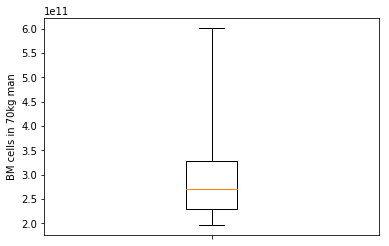

In [24]:
bm_total_cells = pd.read_excel('RBC_data.xlsx','total_marrow_cells',index_col=0,usecols = range(0,2))
bm_total_cells.loc[:,'BM cells in 70kg man']= bm_total_cells.loc[:,'Erythroid marrow cells x10^9/kg']*70*10**9
#print(bm_total_cells)
plt.boxplot(bm_total_cells.loc[:,'BM cells in 70kg man'],whis=3)
plt.ylabel('BM cells in 70kg man')
plt.xticks([1],[''])

# removing outliers
z = np.abs(stats.zscore(bm_total_cells))
threshold = 3
#print(np.where(z > threshold))
bm_total_cells = bm_total_cells[(z < threshold).all(axis=1)]


BM_cells = ufloat(bm_total_cells.loc[:,'BM cells in 70kg man'].mean(),bm_total_cells.loc[:,'BM cells in 70kg man'].sem())
print('BM cells {:0.1eP}'.format(BM_cells))
print('Boxplot representing the distribution of BM cells according to different sources')
print('The main body of the boxplot showing the quartiles (25%-75%) and the median (orange horizontal line)')
print('The vertical lines extending to the most extreme, non-outlier data points')

In [16]:
bm_cells_dis= pd.read_excel('RBC_data.xlsx','marrow_cell_distribution',index_col=0,usecols = range(0,6))
#print(bm_cells_dis)
cells_dis = unumpy.uarray(bm_cells_dis['% of erythroblast'], bm_cells_dis['delta % erytroblast'])
erythroblast_num = BM_cells*cells_dis
generation_time = unumpy.uarray(bm_cells_dis['generation [h]'], bm_cells_dis['gen error [h]'])

#finding the index of reticulocytes and inserting the values from Skarberg et al., 1974, assuming body mass of 70 kg
erythroblast_num[list(bm_cells_dis.index).index('Marrow reticulocytes ')]=ufloat(4.6,1.1)*70*10**9 
#print(unumpy.nominal_values(erythroblast_num))


C:\Users\ronse\anaconda3\lib\site-packages\numpy\lib\function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


### Lifespan in the bone marrow
Assuming that there is one mitosis in each of the mitotic progenitors phases, the time the cell spend in the mitotic bone marrow can be calculated using their relative abundant.
We derive also the time the cells spent in the non-mitotic bone marrow

In [17]:
#for the mitotic population - how much time they spent in the pool, considering that there are some that being added in each stage
#hence we average using weights of the population distribution
#we first trunc the arrays of only mitotic phases 
mit_gen_time=generation_time[np.where(bm_cells_dis['mitotic']=='mitotic')]
mit_time_in_bm = np.cumsum(mit_gen_time[::-1])[::-1]  #how much time to spent in the marrow has each cell
#we also want the distribution of only mitotic erythroblast in the marrow
mit_dist=cells_dis[np.where(bm_cells_dis['mitotic']=='mitotic')]/sum(cells_dis[np.where(bm_cells_dis['mitotic']=='mitotic')])
mitotic_time = sum(mit_dist*mit_time_in_bm)
print('lifespan in mitotic pool {:0.0fP} hours'.format(mitotic_time))

nonmitotic_time = sum(generation_time[np.where(bm_cells_dis['mitotic']!='mitotic')])
print('lifespan in BM non-mitotic pool {:0.0fP} hours'.format(nonmitotic_time))


lifespan in mitotic pool 32±6 hours
lifespan in BM non-mitotic pool 71±15 hours


### production and turnover of RBC in the bone marrow
We can get two estimates for the turnover of the RBC using the mitotic pool and the non-mitotic pool in the marrow, with the assumption that in steady state the turnover of these need to be equal

In [18]:
mit_eryth = sum(erythroblast_num[np.where(bm_cells_dis['mitotic']=='mitotic')]) 
non_mit_eryth = sum(erythroblast_num[np.where(bm_cells_dis['mitotic']!='mitotic')]) 
   
print('cells in BM mitotic pool {:0.1eP}'.format(mit_eryth))
print('cells in BM non-mitotic pool {:0.1eP}'.format(non_mit_eryth))


mit_turnover = mit_eryth/(mitotic_time/24)  #moving from units of hours to days 
non_mit_turnover = non_mit_eryth/(nonmitotic_time/24) #moving from units of hours to days 


print('turnover rates of the cells in BM mitotic pool {:0.1eP} cells per day'.format(mit_turnover))
print('turnover rates of the cells in BM non-mitotic pool {:0.1eP} cells per day'.format(non_mit_turnover))


RBC.res.loc['BM RBC','number'] = mit_eryth + non_mit_eryth
RBC.res.loc['BM RBC','lifespan'] = nonmitotic_time/24
RBC.print_params('number','BM RBC')

cells in BM mitotic pool (1.5±0.3)×10¹¹
cells in BM non-mitotic pool (4.6±0.9)×10¹¹
turnover rates of the cells in BM mitotic pool (1.2±0.3)×10¹¹ cells per day
turnover rates of the cells in BM non-mitotic pool (1.6±0.4)×10¹¹ cells per day
Number of BM RBC is: (6.2±1.0)×10¹¹ cells


It seems that there is a slightly underestimation from these cells. One explanation could be that there are more cells in the bone marrow pool, or that the the mitotic pool overall generation time is less (if for example there is more than one replication in the (final mitotic) polychromatic erythroblasts phase)

## Total erythrocytes 
Summing the circulating and the bone marrow RBCs:

In [19]:
#the total number and the total lifespan are the sum of the two components:
RBC.res.loc['erythrocytes',['number','lifespan']] = RBC.res.loc['circulating RBC',['number','lifespan']] + RBC.res.loc['BM RBC',['number','lifespan']]

#the reference turnover is from the circulating cells as they are much more easy to estimate:
RBC.res.loc['erythrocytes','cellular turnover rate'] = RBC.res.loc['circulating RBC','cellular turnover rate'] 

RBC.res.loc['erythrocytes','total cellular mass'] = RBC.res.loc['erythrocytes','number']*RBC.res.loc['erythrocytes','cell mass']/10**12 
RBC.res.loc['erythrocytes','cellular turnover rate'] = RBC.res.loc['erythrocytes','number']/RBC.res.loc['erythrocytes','lifespan'] 
RBC.res.loc['erythrocytes','cellular mass turnover rate'] = RBC.res.loc['erythrocytes','total cellular mass']/RBC.res.loc['erythrocytes','lifespan'] 

RBC.print_params(cell_types = 'erythrocytes')


Number of erythrocytes is: (2.5±0.1)×10¹³ cells
Lifespan of erythrocytes is: 119±3 days
Cellular turnover rate of erythrocytes is: (2.1±0.1)×10¹¹ cells per day
Cell mass of erythrocytes is: 94±3 pg
Cellular mass turnover rate of erythrocytes is: 20.0±1.0 grams per day
Total cellular mass of erythrocytes is: 2380±100 grams


## Survival function and age
We use the data gather for the lifespan of circulating cells (from  [Shrestha et al., 2016](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4887310/)) and transit time from the marrow to plot the relevant survival function and cells age

### Survival function


Text(0.5, 1.0, 'Survival function of erythroctes')

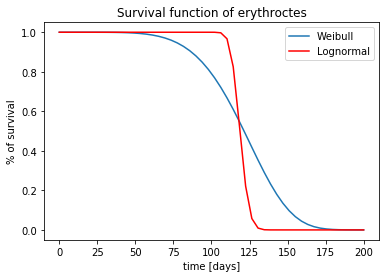

In [20]:
# Sample different time (days)
days = np.linspace(0,200)

Weibull_SF = lambda t,a,b: np.exp(-(np.maximum(t,0)/b)**a)
lognormal_SF = lambda t,a,b: 1-stats.norm.cdf((np.log(np.maximum(t,1))-a)/b)

#translating the trasnit time in the bone marrow from hours to days
transit_t = (mitotic_time.nominal_value+nonmitotic_time.nominal_value)/24;

#gamma = 1-stats.gamma.cdf(days , a=circ_lifepan_data.loc['gamma','alpha'], loc=circ_lifepan_data.loc['gamma','betta'])

Sfun_Weibull = Weibull_SF(days-transit_t ,circ_lifepan_data.loc['Weibull','alpha'],circ_lifepan_data.loc['Weibull','betta'])
Sfun_lognormal = lognormal_SF(days-transit_t ,circ_lifepan_data.loc['lognormal','alpha'],circ_lifepan_data.loc['lognormal','betta'])


# Plot the survival functions vs. the time
plt.plot(days,Sfun_Weibull)
plt.plot(days,Sfun_lognormal,'r')
#plt.plot(days,gamma ,'r')

plt.xlabel('time [days]')
plt.ylabel('% of survival')
plt.legend(['Weibull','Lognormal'])
plt.title('Survival function of erythroctes')

### Cells age

We know that the age distribution look like the survival functio, hence we can calculate the age cdf by integrating the survival function and normalize it:

Text(0.5, 1.0, 'Age distribution of erythroctes')

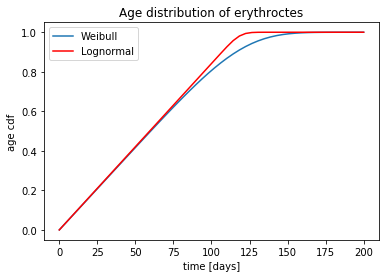

In [21]:
sf_Wb_integral = integrate.cumtrapz(Sfun_Weibull, days, initial=0)
age_Wb_cdf = sf_Wb_integral/max(sf_Wb_integral)

sf_LN_integral = integrate.cumtrapz(Sfun_lognormal, days, initial=0)
age_LN_cdf = sf_LN_integral/max(sf_LN_integral)


# Plot the age functions vs. the time
plt.plot(days,age_Wb_cdf)
plt.plot(days,age_LN_cdf,'r')
plt.xlabel('time [days]')
plt.ylabel('age cdf')
plt.legend(['Weibull','Lognormal'])
plt.title('Age distribution of erythroctes')

## Saving the results to excell
So it can be used for summary 


In [22]:
#removing the circulating RBC and the ones from the bone marrow so only the total will be saved 
RBC.res = RBC.res.drop(['circulating RBC','BM RBC'])
RBC.export_to_excel('Summary.xlsx')